# Bank Marketing Campaign - Predicting Term Deposit(Classification)

## Objective - The project has the objective of classifying customers of a bank based on their features whether they will be subscribing to a term deposit scheme offered by the bank (class 1 customers) or have a less likelihood of subscribing to the scheme (class 0 customers).

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
df = pd.read_csv("C:\\Users\\tanum\\Downloads\\bank-additional-full (1).csv")

In [7]:
df

,age,job,marital,education,car.loan,hou.loan,per.loan,contact,month,day_of_week,campaign,pdays,outcome,y
0,56,housemaid,married,basic.4y,yes,no,no,telephone,may,mon,1,999,hold,no
1,57,services,married,high.school,yes,no,no,telephone,may,mon,1,999,hold,no
2,37,services,married,high.school,yes,yes,no,telephone,may,mon,1,999,hold,no
3,40,admin.,married,basic.6y,yes,no,no,telephone,may,mon,1,999,hold,no
4,56,services,married,high.school,yes,no,yes,telephone,may,mon,1,999,hold,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,hold,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,hold,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,yes


In [8]:
#shape of data
df.shape

(41188, 14)

In [9]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41188 non-null  int64 
 1   job          41188 non-null  object
 2   marital      41188 non-null  object
 3   education    41188 non-null  object
 4   car.loan     41188 non-null  object
 5   hou.loan     41188 non-null  object
 6   per.loan     41188 non-null  object
 7   contact      41188 non-null  object
 8   month        41188 non-null  object
 9   day_of_week  41188 non-null  object
 10  campaign     41188 non-null  int64 
 11  pdays        41188 non-null  int64 
 12  outcome      41188 non-null  object
 13  y            41188 non-null  object
dtypes: int64(3), object(11)
memory usage: 4.4+ MB


In [10]:
#checking null value present in the dataset
df.isnull().sum()

age            0
job            0
marital        0
education      0
car.loan       0
hou.loan       0
per.loan       0
contact        0
month          0
day_of_week    0
campaign       0
pdays          0
outcome        0
y              0
dtype: int64

In [11]:
#no of unique values under each variable (i.e., feature)
df.nunique()

age            78
job            12
marital         3
education       7
car.loan        2
hou.loan        2
per.loan        2
contact         2
month          10
day_of_week     5
campaign       42
pdays          27
outcome         3
y               2
dtype: int64

In [12]:
df.describe() # to get descriptive statistical analysis

,age,campaign,pdays
count,41188.00000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454
std,10.42125,2.770014,186.910907
min,17.00000,1.000000,0.000000
25%,32.00000,1.000000,999.000000
50%,38.00000,2.000000,999.000000
75%,47.00000,3.000000,999.000000
max,98.00000,56.000000,999.000000


In [13]:
#renaming 'y' as 'target'
df = df.rename(columns = {'y': 'target'})

In [14]:
df.head()

,age,job,marital,education,car.loan,hou.loan,per.loan,contact,month,day_of_week,campaign,pdays,outcome,target
0,56,housemaid,married,basic.4y,yes,no,no,telephone,may,mon,1,999,hold,no
1,57,services,married,high.school,yes,no,no,telephone,may,mon,1,999,hold,no
2,37,services,married,high.school,yes,yes,no,telephone,may,mon,1,999,hold,no
3,40,admin.,married,basic.6y,yes,no,no,telephone,may,mon,1,999,hold,no
4,56,services,married,high.school,yes,no,yes,telephone,may,mon,1,999,hold,no


<AxesSubplot:>

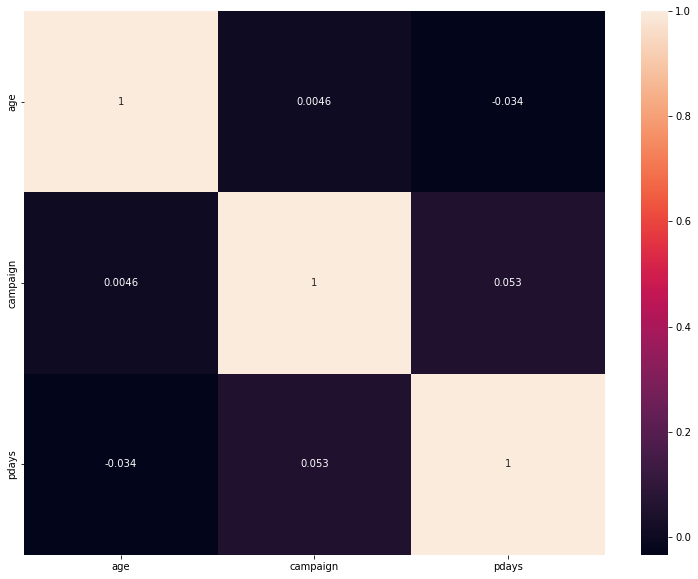

In [15]:
#checking corelation between features
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(df.corr(),annot=True)

# Making Box Plot of numeric attributes to check outliers

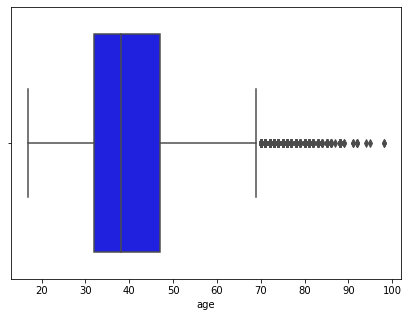

In [16]:
#for 'age' feature
plt.figure(figsize=(7,5))
fig = sns.boxplot(x='age', data = df, color='blue')

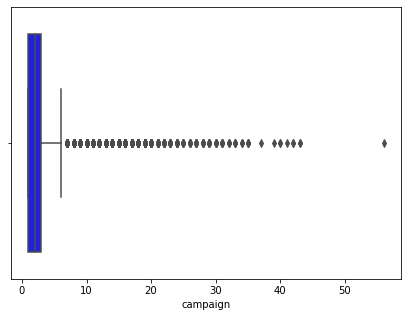

In [17]:
plt.figure(figsize=(7,5))
fig = sns.boxplot(x='campaign' , data=df,  color = 'blue')

# Exploratory Data Analysis

<AxesSubplot:xlabel='marital', ylabel='count'>

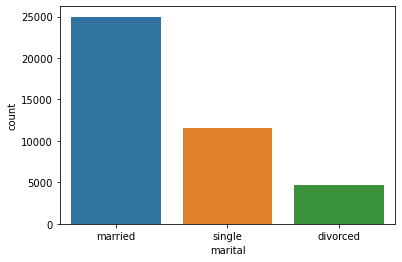

In [18]:
#visualizing Categorical Variable
plt.figure(figsize=(6,4))
sns.countplot(x='marital', data=df)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'high.school'),
  Text(2, 0, 'basic.6y'),
  Text(3, 0, 'basic.9y'),
  Text(4, 0, 'professional.course'),
  Text(5, 0, 'university.degree'),
  Text(6, 0, 'illiterate')])

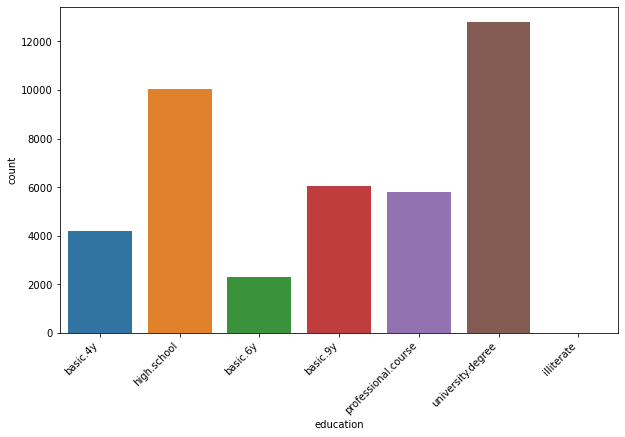

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', data=df)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

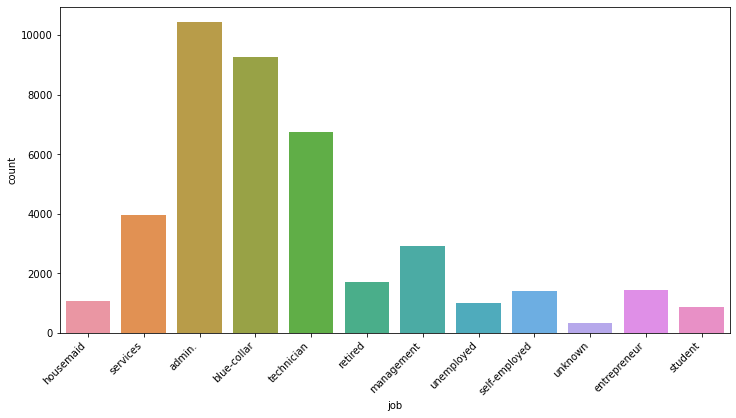

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 0, 'Car loan')

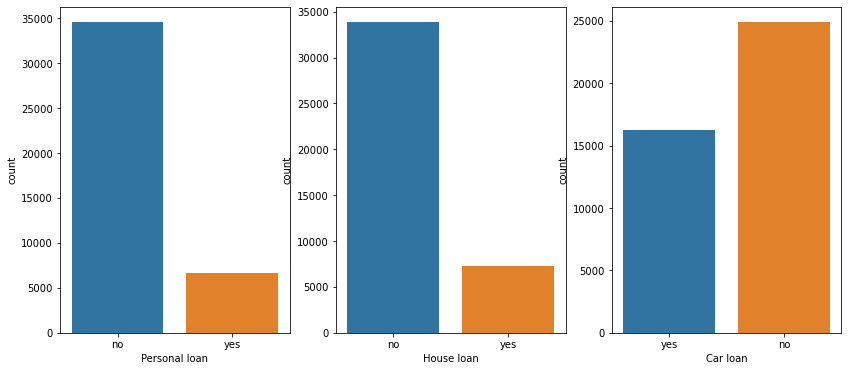

In [21]:
#comparison between 3 kind of loans
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols=3, figsize=(14,6))
sns.countplot(x="per.loan",data=df,ax=ax1)
ax1.set_xlabel("Personal loan")
sns.countplot(x="hou.loan",data=df,ax=ax2)
ax2.set_xlabel("House loan")
sns.countplot(x="car.loan", data=df,ax=ax3)
ax3.set_xlabel('Car loan')


In [22]:
#converting target variable in 0 for 1 for yes
df['target']=df['target'].replace({'no':0,'yes':1})


In [23]:
df.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

Text(0.5, 1.0, 'job vs term deposit(total count)')

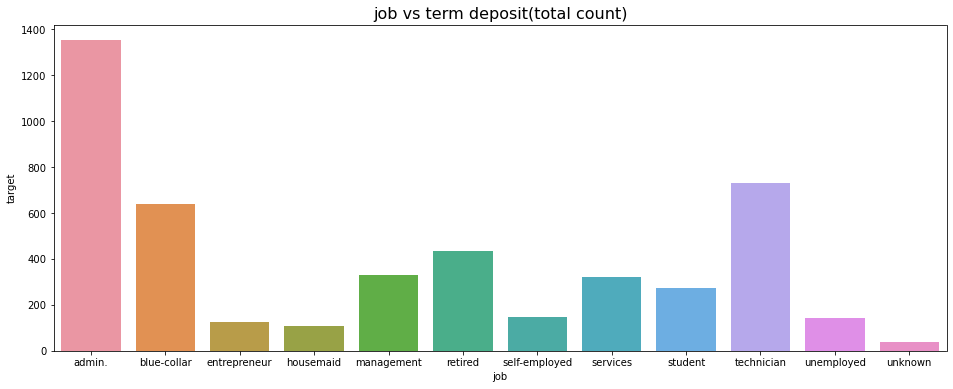

In [24]:
df1= df.groupby('job').agg({'target':'sum'})
plt.figure(figsize=(16,6))
sns.barplot(x=df1.index, y=df1.target, data=df1)
plt.title('job vs term deposit(total count)', fontsize=16)

In [25]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'marital vs term depost (total count)')

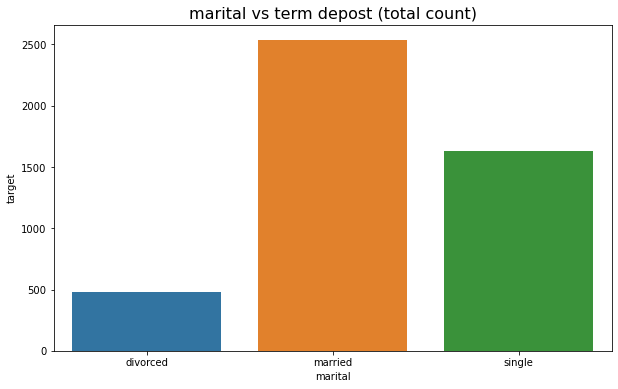

In [26]:
df1= df.groupby('marital').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x=df1.index, y = df1.target, data=df1)
plt.title("marital vs term depost (total count)", fontsize=16)

In [27]:
df.marital.value_counts()

married     24977
single      11590
divorced     4621
Name: marital, dtype: int64

Text(0.5, 1.0, 'month vs term deposit (total)')

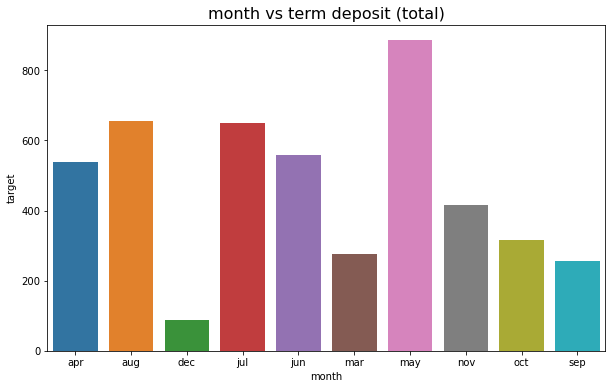

In [28]:
df1 = df.groupby('month').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x=df1.index, y=df1.target, data=df1)
plt.title('month vs term deposit (total)', fontsize=16)

In [29]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

Text(0.5, 1.0, 'day_of_week vs term deposit(total)')

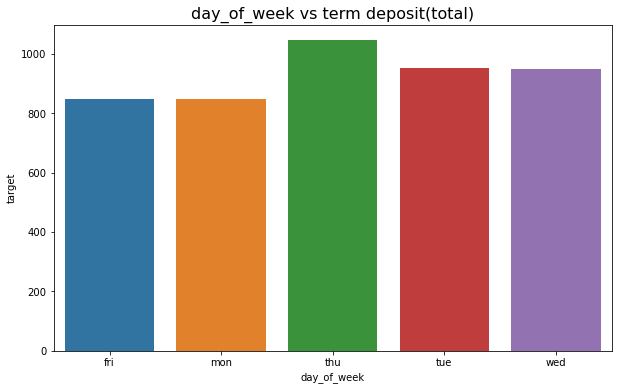

In [30]:
df1= df.groupby('day_of_week').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x=df1.index, y=df1.target, data=df1)
plt.title('day_of_week vs term deposit(total)', fontsize=16)

In [31]:
df.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

#### For term deposit prime customers were working professionals, retired persons and students. Demographic wise no of married customers has been called more for term deposit. And highest no of calls happened in first 4-5 months in annual year to fill their targets. They most calls happened on thrusday maybe the workpressure was little less and also for fullfilling weekly targets

# Data Preparation

In [32]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [33]:
#in pdays
df['pdays_cat'] = ['not_cont' if each==999 else 'cont' for each in df.pdays]

In [34]:
df

,age,job,marital,education,car.loan,hou.loan,per.loan,contact,month,day_of_week,campaign,pdays,outcome,target,pdays_cat
0,56,housemaid,married,basic.4y,yes,no,no,telephone,may,mon,1,999,hold,0,not_cont
1,57,services,married,high.school,yes,no,no,telephone,may,mon,1,999,hold,0,not_cont
2,37,services,married,high.school,yes,yes,no,telephone,may,mon,1,999,hold,0,not_cont
3,40,admin.,married,basic.6y,yes,no,no,telephone,may,mon,1,999,hold,0,not_cont
4,56,services,married,high.school,yes,no,yes,telephone,may,mon,1,999,hold,0,not_cont
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,hold,1,not_cont
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,0,not_cont
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,hold,0,not_cont
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,hold,1,not_cont


In [35]:
df.pdays_cat.value_counts()

not_cont    39673
cont         1515
Name: pdays_cat, dtype: int64

In [36]:
#drop a column 'pdays'
df = df.drop(['pdays'],axis=1)

In [37]:
df.shape

(41188, 14)

# User-Defined function for Outlier Treatment

In [38]:
term=df.copy()

In [39]:
outliers=[]
upper_lim = 0
lower_lim = 0
def outlier_detection(x):
    global outliers
    x_dict = dict(df[x].describe())
    print(x_dict)
    Q1=x_dict['25%']
    print("Q1:", Q1)
    Q3=x_dict['75%']
    print("Q3:",Q3)
    IQR= Q3-Q1
    print("Inter quartile range is", IQR)
    global lower_lim
    global upper_lim
    lower_lim=Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    return(lower_lim,upper_lim)

In [40]:
outlier_detection('age')

{'count': 41188.0, 'mean': 40.02406040594348, 'std': 10.421249980934235, 'min': 17.0, '25%': 32.0, '50%': 38.0, '75%': 47.0, 'max': 98.0}
Q1: 32.0
Q3: 47.0
Inter quartile range is 15.0


(9.5, 69.5)

In [41]:
term.loc[((term['age']>=69.5)& (term['age']<=98.0)), 'age'] = round(upper_lim)

Text(0.5, 0, 'Histogram of age before outlier treatment')

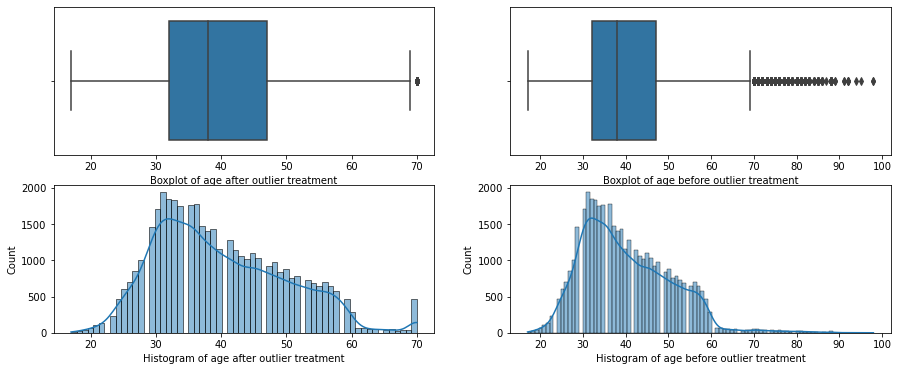

In [42]:
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(15,6))
sns.boxplot(x='age', data=term, ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of age after outlier treatment')
sns.boxplot(x='age', data=df, ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of age before outlier treatment')
sns.histplot(x='age',data=term,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of age after outlier treatment')
sns.histplot(x='age',data=df,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of age before outlier treatment')

In [43]:
outliers.clear()
outlier_detection('campaign')

{'count': 41188.0, 'mean': 2.567592502670681, 'std': 2.7700135429021127, 'min': 1.0, '25%': 1.0, '50%': 2.0, '75%': 3.0, 'max': 56.0}
Q1: 1.0
Q3: 3.0
Inter quartile range is 2.0


(-2.0, 6.0)

In [44]:
term.loc[((term['campaign']>= 6) & (term['campaign']<=56.0)), 'campaign' ]=round(upper_lim)

Text(0.5, 0, 'Histogram of campaign before outlier treatment')

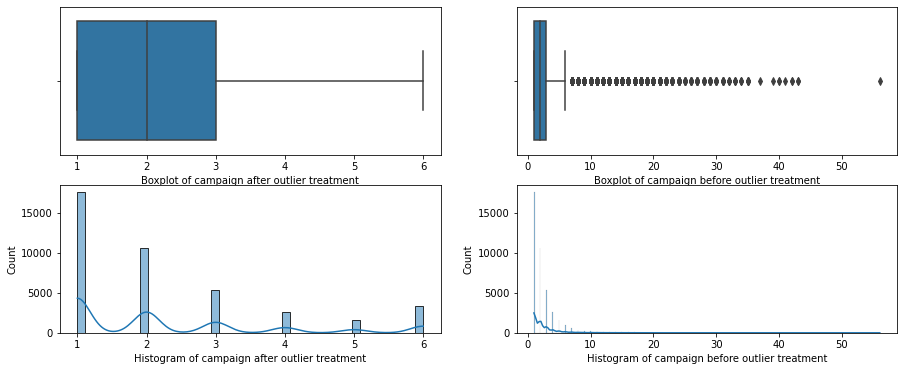

In [45]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
sns.boxplot(x='campaign',data=term,ax=axes[0,0])
axes[0,0].set_xlabel('Boxplot of campaign after outlier treatment')
sns.boxplot(x='campaign',data=df,ax=axes[0,1])
axes[0,1].set_xlabel('Boxplot of campaign before outlier treatment')
sns.histplot(x='campaign',data=term,kde=True,ax=axes[1,0])
axes[1,0].set_xlabel('Histogram of campaign after outlier treatment')
sns.histplot(x='campaign',data=df,kde=True,ax=axes[1,1])
axes[1,1].set_xlabel('Histogram of campaign before outlier treatment')

# Separating Predictor and Target attribute

In [46]:
#independent and dependent feature
X = term.drop('target', axis=1)
y= term['target']

In [47]:
X.shape

(41188, 13)

In [48]:
y.shape

(41188,)

# Separating Categorical and Numeric Variables

In [49]:
X_num = X.drop(['job', 'marital', 'education', 'car.loan', 'hou.loan', 'per.loan','contact', 'month', 'day_of_week','outcome','pdays_cat'],axis = 1)
X_cat = X[['job', 'marital', 'education', 'car.loan', 'hou.loan', 'per.loan','contact', 'month', 'day_of_week','outcome','pdays_cat']]

In [50]:
X_num.shape

(41188, 2)

In [51]:
X_cat.shape

(41188, 11)

# Preprocessing on Numerical Data

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=X_num.columns)

# Preprocessing on Categorical Data

In [54]:
#dummy encoding on X set
X_cat_dummy=pd.get_dummies(X_cat,drop_first=True)

In [55]:
#Add categorical and numerical data
X_final = pd.concat([X_num_scaled_df, X_cat_dummy],axis=1,sort=False)

In [56]:
X_final.shape

(41188, 41)

In [57]:
y.shape

(41188,)

# Train-test Split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y, test_size = 0.20,random_state=42)


In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 41), (8238, 41), (32950,), (8238,))

In [61]:
from collections import Counter
print(Counter(y_train))

Counter({0: 29245, 1: 3705})


## Applying Random Oversampling technique for balancing the classes


This method randomly selectes records from the minority class, with replacement, and adds them to the training dataset. In process, it ensures equal participation from both classes in the training dataset

In [62]:
!pip install imblearn

In [63]:
from imblearn.over_sampling import RandomOverSampler


In [64]:
RO = RandomOverSampler(sampling_strategy='minority')

In [65]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [66]:
X_train_os.shape,y_train_os.shape

((58490, 41), (58490,))

In [67]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))

Counter({0: 29245, 1: 3705})
Counter({0: 29245, 1: 29245})


In [68]:
X_train_os.shape, X_test.shape, y_train_os.shape, y_test.shape

((58490, 41), (8238, 41), (58490,), (8238,))

# Model Construction and Testing

In [69]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score

In [70]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_score= metrics.f1_score(x,y)
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('F1 score is :',F1_score )
    print('precision score is :',precision )
    print('recall score is :',recall )
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train_os,y_train_os)
y_predLR=LR.predict(X_test)

accuracy score is : 0.7919397912114591
F1 score is : 0.385663082437276
precision score is : 0.2900269541778976
recall score is : 0.5754010695187166


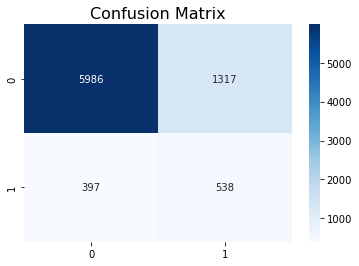

In [72]:
classification_metrics(y_test,y_predLR)

# Decision Tree Classifier

In [73]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [74]:
dtree.fit(X_train_os,y_train_os)
y_predDT=dtree.predict(X_test)

accuracy score is : 0.8277494537509105
F1 score is : 0.30132939438700146
precision score is : 0.2791970802919708
recall score is : 0.32727272727272727


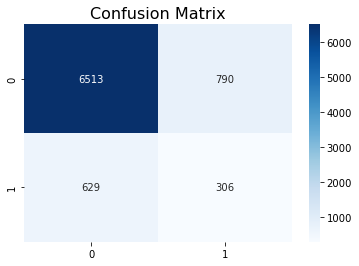

In [75]:
classification_metrics(y_test,y_predDT)

In [76]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train_os,y_train_os) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 7, 'min_samples_split': 50}


In [77]:
y_predDT1=tree_grid.predict(X_test)

accuracy score is : 0.7705753823743627
F1 score is : 0.3553888130968622
precision score is : 0.26089133700550826
recall score is : 0.5572192513368984


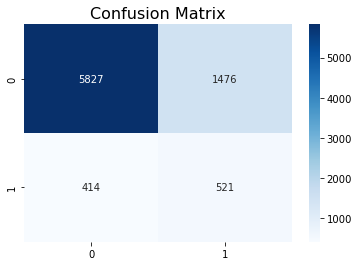

In [78]:
classification_metrics(y_test,y_predDT1)

# Random Forest Classifier

In [79]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(criterion='gini',random_state=0,max_depth=7,min_samples_split=50)
RF.fit(X_train_os,y_train_os)
y_predRF=RF.predict(X_test)

accuracy score is : 0.8335761107064822
F1 score is : 0.41684389621437684
precision score is : 0.346045197740113
recall score is : 0.5240641711229946


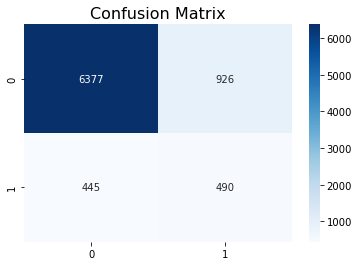

In [80]:
classification_metrics(y_test,y_predRF)